In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scipy

In [14]:
def likelihood(X,Y,x0,y0,r0):
    chi2 = 0
    for i in range(X.size):
        aux = abs( (X[i]-x0)**2 + (Y[i]-y0)**2 -r0**2 )
        #print aux
        chi2 += aux
    return exp(-chi2), chi2

4289789.69
0


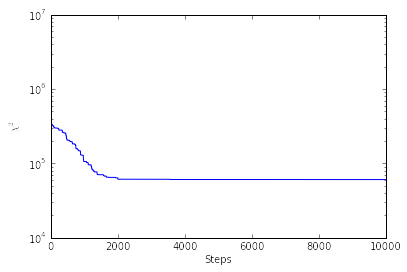

In [110]:
data = np.loadtxt("circlepoints.txt", delimiter=",")

x0 = 969.5
y0 = 937.6


A = 3
if A == 1:
    r0 = 635.
if A == 2:
    r0 = 1500.
if A == 3:
    r0 = 3000.

X = data[range(11*(A-1),A*11),0]
Y = data[range(11*(A-1),A*11),1]




L = likelihood(X,Y,x0,y0,r0)


#rint L

MCsteps = 10000
MCMC_steps = []

print L[1]
for step in range(MCsteps):
    x0_new = np.random.normal(x0,1.)
    y0_new = np.random.normal(y0,1.)
    r0_new = np.random.normal(r0,10)
    
    L_new = likelihood(X,Y,x0_new,y0_new,r0_new)
    
    if ( L_new[1]/L[1] <=1 ):
        x0 = x0_new
        y0 = y0_new
        r0 = r0_new
        L  = L_new
    else:
        p = random.rand(1)[0]
        if ( exp( - L_new[1]+L[1] )> p):
            x0 = x0_new
            y0 = y0_new
            r0 = r0_new
            L  = L_new

    MCMC_steps.append([x0,y0,r0,L[1]])
    
    #print L
    if (step%10000==0):
        print step

MCMC_steps = array(MCMC_steps); X_walk = MCMC_steps[:,0]; Y_walk = MCMC_steps[:,1]; R_walk = MCMC_steps[:,2]; L_walk = MCMC_steps[:,3]


plot(L_walk); yscale('log'); ylabel(r'$\chi^2$'); xlabel('Steps')



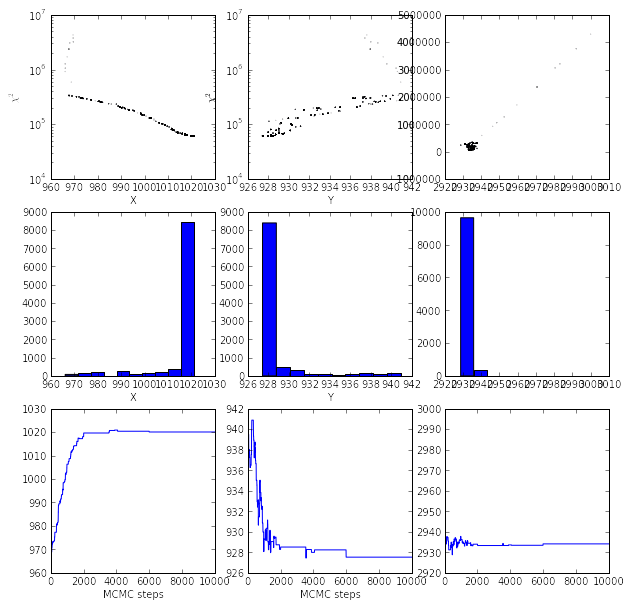

In [111]:
fig = figure(figsize=(10,10)); gs1 = GridSpec(3,3)

ax0 = plt.subplot(gs1[0,0])
ax1 = plt.subplot(gs1[0,1])  
ax6 = plt.subplot(gs1[0,2])
ax2 = plt.subplot(gs1[1,0])  
ax3 = plt.subplot(gs1[1,1])
ax7 = plt.subplot(gs1[1,2])
ax4 = plt.subplot(gs1[2,0])  
ax5 = plt.subplot(gs1[2,1])  
ax8 = plt.subplot(gs1[2,2])

ax0.scatter(X_walk,L_walk, s=0.01)
ax1.scatter(Y_walk,L_walk, s=0.01)
ax6.scatter(R_walk,L_walk, s=0.01)
ax2.hist(X_walk)
ax3.hist(Y_walk)
ax7.hist(R_walk)

ax4.plot(X_walk)
ax5.plot(Y_walk)
ax8.plot(R_walk)


ax0.set_yscale('log'); #ax0.set_ylim([0.0001,10000])
ax1.set_yscale('log'); #ax1.set_ylim([0.0001,10000])

ax0.set_xlabel('X')
ax1.set_xlabel('Y')
ax2.set_xlabel('X')
ax3.set_xlabel('Y')
ax4.set_xlabel('MCMC steps')
ax5.set_xlabel('MCMC steps')

ax0.set_ylabel(r'$\chi^2$')
ax1.set_ylabel(r'$\chi^2$')


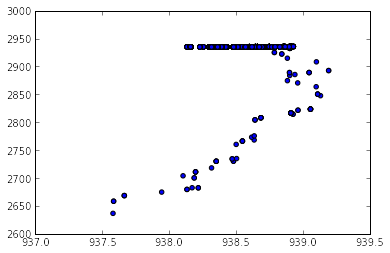

In [104]:
scatter(Y_walk,R_walk)

<matplotlib.colorbar.Colorbar instance at 0x2a4fb560>

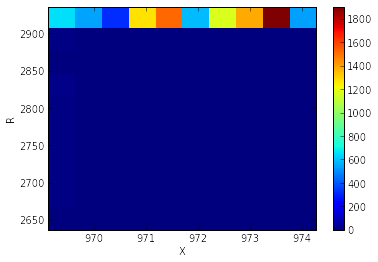

In [105]:
hist2d(X_walk,R_walk,bins=10)
xlabel('X')
ylabel('R')
colorbar()

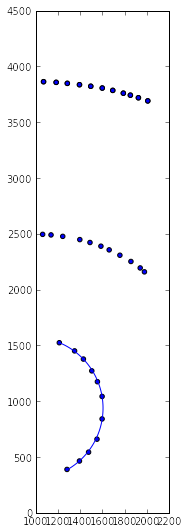

In [107]:
fig = figure(figsize=[9,9])
ax = fig.add_subplot(111)
ax.scatter(X,Y)
ax.set_aspect("equal")

A=1
X1 = data[range(11*(A-1),A*11),0]
Y1 = data[range(11*(A-1),A*11),1]
A=2
X2 = data[range(11*(A-1),A*11),0]
Y2 = data[range(11*(A-1),A*11),1]
A=3
X3 = data[range(11*(A-1),A*11),0]
Y3 = data[range(11*(A-1),A*11),1]

ax.scatter(X1,Y1)
ax.scatter(X2,Y2)
ax.scatter(X3,Y3)

t = linspace(-pi/3,6*pi/16,100)
ax.plot(635*cos(t)+970, 635*sin(t)+938)